# Regression

In [1]:
import pandas as pd 
import numpy as np

## 1. Import Data

In [2]:
df_eviction = pd.read_csv('../data/processed/Eviction.csv')
df_incidents = pd.read_csv('../data/processed/incidents.csv')

In [3]:
df_eviction.head()

,EvictionID,Address,City,State,Zipcode,Date,Nonpayment,Breach,Nuisance,IllegalUse,...,Development,GoodSamaritanEnds,SupervisorDistrict,Neighborhoods,Location,X,Y,Day,Month,Year
0,m192806,700 block of kearny street,san francisco,ca,94111,2019-10-18,False,True,False,False,...,False,False,3.0,chinatown,-122.40476763634015 37.79466465355738,-122.404768,37.794665,18,10,2019
1,m192020,400 block of 35th avenue,san francisco,ca,94121,2019-08-16,False,False,False,False,...,False,False,1.0,outer richmond,-122.4954513144922 37.780562090999126,-122.495451,37.780562,16,8,2019
2,m192145,200 block of font boulevard,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,False,7.0,lakeshore,-122.47509247803765 37.71643640083831,-122.475092,37.716436,28,8,2019
3,m191890,0 block of levant street,san francisco,ca,94114,2019-08-02,False,False,False,False,...,False,False,8.0,castro/upper market,-122.44212894562347 37.764255519062026,-122.442129,37.764256,2,8,2019
4,m192140,0 block of bucareli drive,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,False,7.0,lakeshore,-122.4793742747656 37.71746280191635,-122.479374,37.717463,28,8,2019


In [4]:
df_incidents.head()

,Unnamed: 0,IncidentNum,Category,Description,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month,Day
0,0,110308742,missing person,found person,friday,2011-04-15,16:00:00,taraval,located,0 block of crespi dr,-122.476328,37.719687,point (-122.476327815126 37.7196874952717),1.103087e+13,2011.0,4.0,15.0
1,1,90316914,warrants,warrant arrest,thursday,2009-03-26,12:28:00,southern,"arrest, booked",1000 block of market st,-122.411340,37.781271,point (-122.411339562557 37.7812707434494),9.031691e+12,2009.0,3.0,26.0
2,2,130132311,secondary codes,domestic violence,friday,2013-02-15,02:00:00,park,"arrest, booked",castro st / market st,-122.435188,37.762670,point (-122.435187699349 37.7626702770872),1.301323e+13,2013.0,2.0,15.0
3,3,80052833,other offenses,"drivers license, suspended or revoked",tuesday,2008-01-15,20:13:00,mission,"arrest, cited",valencia st / 16th st,-122.421886,37.764918,point (-122.421886357981 37.7649178909424),8.005283e+12,2008.0,1.0,15.0
4,4,70535770,secondary codes,domestic violence,saturday,2007-05-26,18:10:00,mission,"arrest, booked",2800 block of folsom st,-122.413935,37.751693,point (-122.413935404044 37.7516932889916),7.053577e+12,2007.0,5.0,26.0


In [5]:
districts = df_incidents.groupby(['PdDistrict']).IncidentNum.count()
districts

PdDistrict
bayview       104001
central       104608
ingleside      91032
mission       139486
northern      128454
park           58570
richmond       54407
southern      187745
taraval        78714
tenderloin     90745
Name: IncidentNum, dtype: int64

In [6]:
ngbh_dist = {
    'bayview hunters point': 'bayview',
    'bernal heights': 'ingleside',
    'castro/upper market': 'mission',
    'chinatown': 'central',
    'excelsior': 'ingleside',
    'financial district/south beach': 'central',
    'glen park': 'ingleside',
    'golden gate park': 'richmond',
    'haight ashbury': 'park',
    'hayes valley': 'northern',
    'inner richmond': 'richmond',
    'inner sunset': 'taraval',
    'japantown': 'northern',
    'lakeshore': 'taraval',
    'lincoln park': 'richmond',
    'lone mountain/usf': 'park',
    'marina': 'northern',
    'mclaren park': 'ingleside',
    'mission' : 'mission',
    'mission bay': 'bayview',
    'nob hill': 'central',
    'noe valley': 'mission',
    'north beach': 'central',
    'oceanview/merced/ingleside': 'ingleside',
    'outer mission': 'ingleside',
    'outer richmond': 'richmond',
    'pacific heights': 'northern',
    'portola': 'bayview',
    'potrero hill': 'bayview',
    'presidio': 'richmond',
    'presidio heights': 'richmond',
    'russian hill': 'central',
    'seacliff': 'richmond',
    'south of market': 'southern',
    'sunset/parkside': 'taraval',
    'tenderloin': 'tenderloin',
    'treasure island': 'southern',
    'twin peaks': 'park',
    'visitacion valley': 'ingleside',
    'west of twin peaks': 'ingleside',
    'western addition': 'northern'
}
df_eviction["PdDistrict"] = df_eviction["Neighborhoods"].apply(lambda x: ngbh_dist.get(x))
df_eviction.head()

,EvictionID,Address,City,State,Zipcode,Date,Nonpayment,Breach,Nuisance,IllegalUse,...,GoodSamaritanEnds,SupervisorDistrict,Neighborhoods,Location,X,Y,Day,Month,Year,PdDistrict
0,m192806,700 block of kearny street,san francisco,ca,94111,2019-10-18,False,True,False,False,...,False,3.0,chinatown,-122.40476763634015 37.79466465355738,-122.404768,37.794665,18,10,2019,central
1,m192020,400 block of 35th avenue,san francisco,ca,94121,2019-08-16,False,False,False,False,...,False,1.0,outer richmond,-122.4954513144922 37.780562090999126,-122.495451,37.780562,16,8,2019,richmond
2,m192145,200 block of font boulevard,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,7.0,lakeshore,-122.47509247803765 37.71643640083831,-122.475092,37.716436,28,8,2019,taraval
3,m191890,0 block of levant street,san francisco,ca,94114,2019-08-02,False,False,False,False,...,False,8.0,castro/upper market,-122.44212894562347 37.764255519062026,-122.442129,37.764256,2,8,2019,mission
4,m192140,0 block of bucareli drive,san francisco,ca,94132,2019-08-28,False,True,False,False,...,False,7.0,lakeshore,-122.4793742747656 37.71746280191635,-122.479374,37.717463,28,8,2019,taraval


In [7]:
evictions=df_eviction.groupby('PdDistrict').PdDistrict.count()
evictions

PdDistrict
bayview       2249
central       3988
ingleside     5428
mission       7356
northern      4567
park          2441
richmond      3696
southern      1483
taraval       5562
tenderloin    2582
Name: PdDistrict, dtype: int64

In [43]:
incidents=df_incidents.groupby('PdDistrict').PdDistrict.count()
incidents

PdDistrict
bayview       104001
central       104608
ingleside      91032
mission       139486
northern      128454
park           58570
richmond       54407
southern      187745
taraval        78714
tenderloin     90745
Name: PdDistrict, dtype: int64

In [9]:
evList=[]
for x in range(0, len(evictions)):
    evList.append(evictions[x])
evtotal=sum(evList)
evPerc=[]
for x in evList:
    evPerc.append(x/evtotal)
evPerc

[0.05715084366741208,
 0.1013417361252287,
 0.137934539540557,
 0.1869282374466355,
 0.1160550924984753,
 0.06202988412278918,
 0.09392152876600936,
 0.037685505183980485,
 0.14133970319170563,
 0.06561292945720675]

In [34]:
incList=[]
nameList=[]
for name, x in incidents:
    nameList.append(name)
    incList.append(x)
inctotal=sum(incList)
incPerc=[]
for x in incList:
    incPerc.append(x/inctotal)
incPerc

TypeError: 'int' object is not iterable

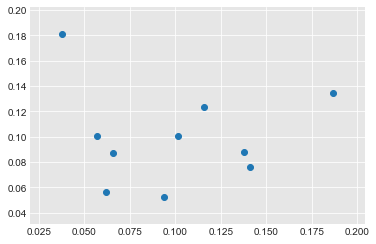

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.scatter(evPerc, incPerc)
plt.show()

In [13]:
dict = {'Evictions': evPerc, 'Indicents': incPerc, 'Name': }   
df_perc = pd.DataFrame(dict) 
df_perc

,Evictions,Indicents
0,0.057151,0.100217
1,0.101342,0.100802
2,0.137935,0.087720
3,0.186928,0.134410
4,0.116055,0.123780
5,0.062030,0.056439
6,0.093922,0.052427
7,0.037686,0.180913
8,0.141340,0.075850
9,0.065613,0.087443


In [29]:
incidents

PdDistrict
bayview       104001
central       104608
ingleside      91032
mission       139486
northern      128454
park           58570
richmond       54407
southern      187745
taraval        78714
tenderloin     90745
Name: PdDistrict, dtype: int64

In [58]:
list1=df_eviction['PdDistrict'].unique()
list1=list(list1)
list1=sorted(list1)
list1

['bayview',
 'central',
 'ingleside',
 'mission',
 'northern',
 'park',
 'richmond',
 'southern',
 'taraval',
 'tenderloin']

In [62]:
df = pd.DataFrame({'Eviction': evPerc,'Incidents': incPerc}, index=list1)
df

,Eviction,Incidents
bayview,0.057151,0.100217
central,0.101342,0.100802
ingleside,0.137935,0.087720
mission,0.186928,0.134410
northern,0.116055,0.123780
park,0.062030,0.056439
richmond,0.093922,0.052427
southern,0.037686,0.180913
taraval,0.141340,0.075850
tenderloin,0.065613,0.087443


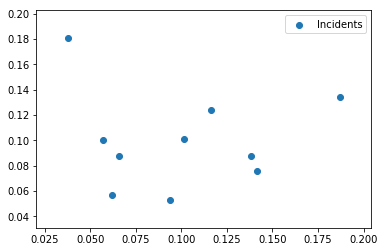

In [63]:
fig,ax=plt.subplots()
plt.scatter(df['Eviction'], df['Incidents'])
ax.legend()
plt.show()

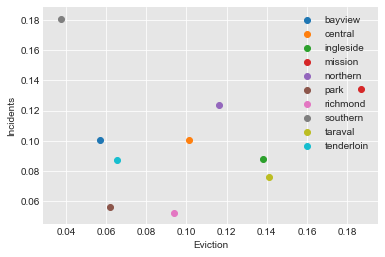

In [70]:
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['Eviction'],row['Incidents'], label=name)

plt.xlabel('Eviction')
plt.ylabel('Incidents')
plt.legend()
plt.show()

In [96]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df['Eviction'].values.reshape(-1,1)
y = df['Incidents'].values.reshape(-1,1)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[0.05715084]
 [0.10134174]
 [0.13793454]
 [0.18692824]
 [0.11605509]
 [0.06202988]
 [0.09392153]
 [0.03768551]
 [0.1413397 ]
 [0.06561293]]


In [81]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred = regressor.predict(X_test)
y_pred

array([[0.10784075],
       [0.10807469]])

In [83]:
y_pred = [y for x in y_pred for y in x]
y_test = [y for x in y_test for y in x]
X_test = [y for x in X_test for y in x]
X_train = [y for x in X_train for y in x]
y_train = [y for x in y_train for y in x]

In [84]:
dict = {'Actual': y_test, 'Predicted': y_pred}   
df_pred = pd.DataFrame(dict) 
df_pred

,Actual,Predicted
0,0.08772,0.107841
1,0.07585,0.108075


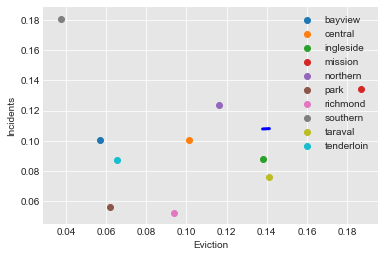

In [88]:
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['Eviction'],row['Incidents'], label=name)

plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Eviction')
plt.ylabel('Incidents')
plt.legend()
plt.show()

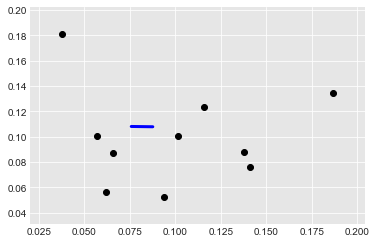

In [91]:
plt.scatter(evPerc, incPerc,  color='black')
plt.plot(y_test, y_pred, color='blue', linewidth=3)
plt.show()

In [94]:
sns.regplot(x = y_test, y=y_pred, data=regressor, line_kws={"color":"orange"})

TypeError: only integer scalar arrays can be converted to a scalar index

In [97]:
print(regressor.coef_)

[[0.06870088]]
